In [1]:
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt

In [2]:
def Clean_date(df):
    for index, value in enumerate(df["Collection_Date"]):
        df["Collection_Date"][index] = datetime.datetime.strptime(value, '%Y-%m-%d %H:%M:%S')        
    return df

In [27]:
def Request_yearly_data(station, variable):
    """
    Request the data with the given station name from the downloaded csv files.
    Select data with the given variable and year.
    Return with the monthly value of that variable and the unit of the values.
    """
    data = pd.read_csv(f"{station}.csv")
    data = Clean_date(data)
    chosen_rows = data["Test Name"]==variable
    chosen_columns = ["Collection_Date", "Value", "Units"]
    year_data = data.loc[chosen_rows, chosen_columns]

    yearly_values = []
    for year in np.arange(1970,2020,1):
        values = year_data.loc[([x.year == year for x in year_data["Collection_Date"]])&(year_data["Value"]>0), "Value"]
        if len(values) > 0:
            yearly_values.append(np.mean(values))
        else:
            yearly_values.append(None)
    
    #Check if the units are inconsistent:
    list_units = list(year_data["Units"])
    if len(list_units) > 0:
        chosen_unit = list_units[0]
        for unit in list_units:
            if unit != list_units [0]:
                chosen_unit = "Inconsistent Units"
                break
    else:
        chosen_unit = None
    return yearly_values, chosen_unit

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


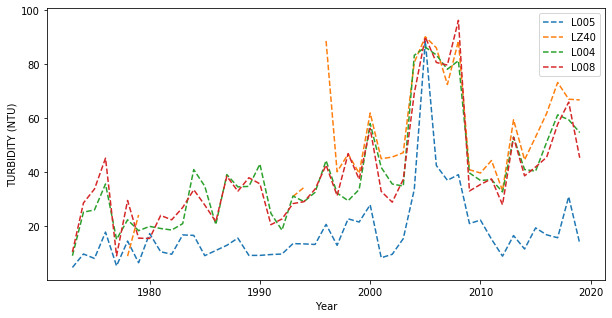

In [21]:
variable = 'TURBIDITY'

plt.figure(figsize=(10,5))
for station in ["L005", "LZ40", "L004", "L008"]:
    yearly_data, unit = Request_yearly_data(station=station, variable=variable)
    if unit == "Inconsistent Units":
        print(f"Inconsistent Units at {station}")
    plt.plot(np.arange(1970,2020,1), yearly_data, label = station, linestyle = '--')
plt.xlabel("Year")
plt.ylabel(f'{variable} ({unit})')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


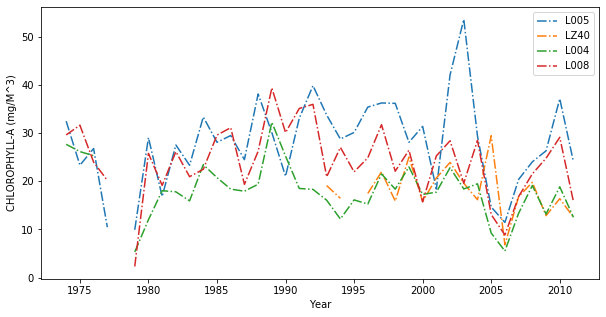

In [17]:
variable = 'CHLOROPHYLL-A'

plt.figure(figsize=(10,5))
for station in ["L005", "LZ40", "L004", "L008"]:
    yearly_data, unit = Request_yearly_data(station=station, variable=variable)
    if unit == "Inconsistent Units":
        print(f"Inconsistent Units at {station}")
    plt.plot(np.arange(1970,2020,1), yearly_data, label = station, linestyle = '-.')
plt.xlabel("Year")
plt.ylabel(f'{variable} ({unit})')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


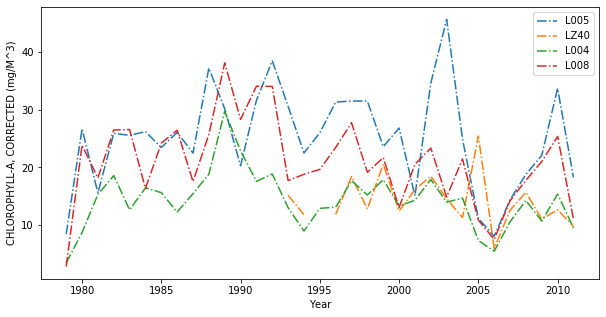

In [16]:
variable = 'CHLOROPHYLL-A, CORRECTED'

plt.figure(figsize=(10,5))
for station in ["L005", "LZ40", "L004", "L008"]:
    yearly_data, unit = Request_yearly_data(station=station, variable=variable)
    if unit == "Inconsistent Units":
        print(f"Inconsistent Units at {station}")
    plt.plot(np.arange(1970,2020,1), yearly_data, label = station, linestyle = '-.')
plt.xlabel("Year")
plt.ylabel(f'{variable} ({unit})')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


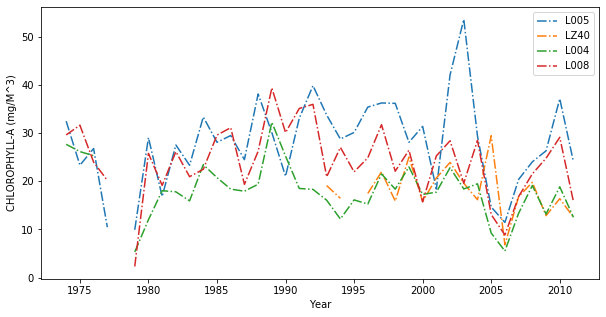

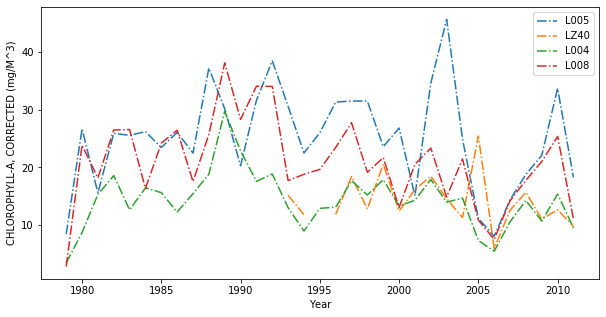

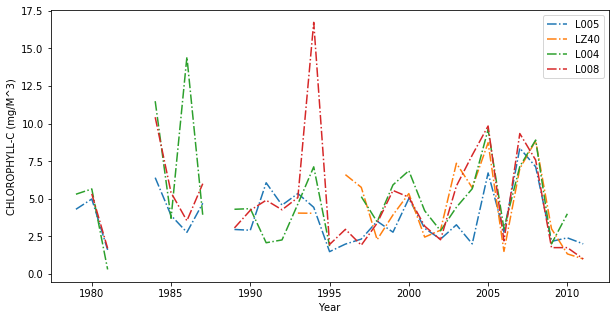

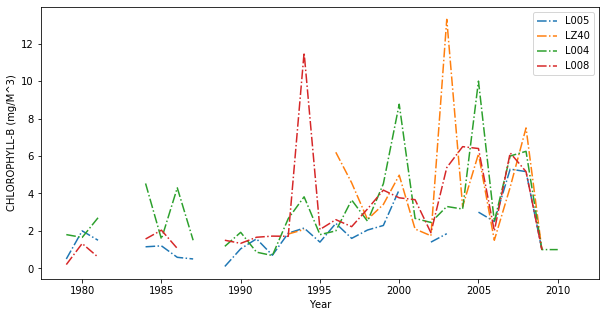

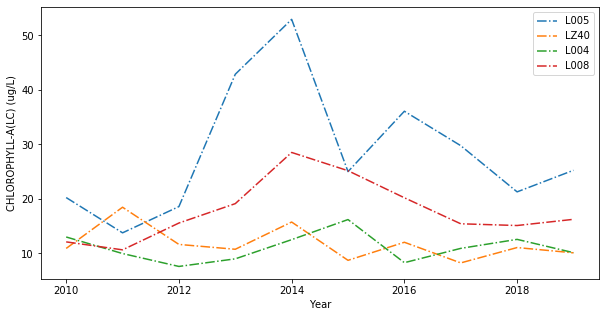

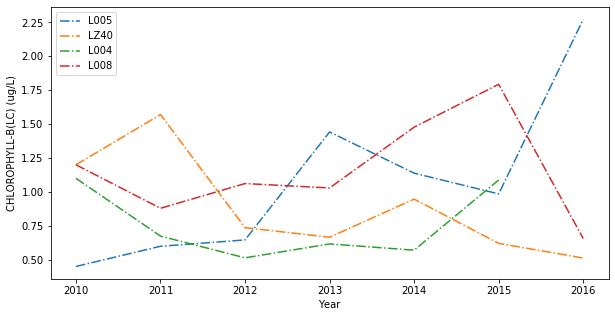

In [18]:
list_chl = ["CHLOROPHYLL-A", "CHLOROPHYLL-A, CORRECTED","CHLOROPHYLL-C", "CHLOROPHYLL-B", "CHLOROPHYLL-A(LC)","CHLOROPHYLL-B(LC)"]
for variable in list_chl:
    plt.figure(figsize=(10,5))
    for station in ["L005", "LZ40", "L004", "L008"]:
        yearly_data, unit = Request_yearly_data(station=station, variable=variable)
        if unit == "Inconsistent Units":
            print(f"Inconsistent Units at {station}")
        plt.plot(np.arange(1970,2020,1), yearly_data, label = station, linestyle = '-.')
    plt.xlabel("Year")
    plt.ylabel(f'{variable} ({unit})')
    plt.legend()
    plt.show()    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


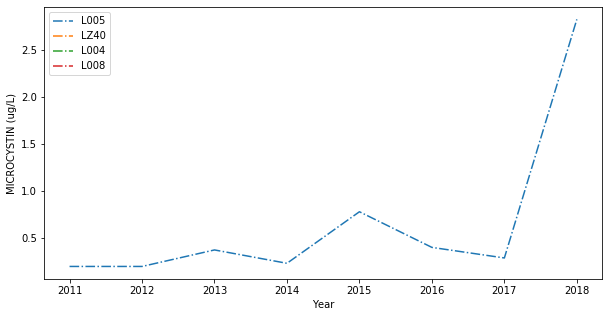

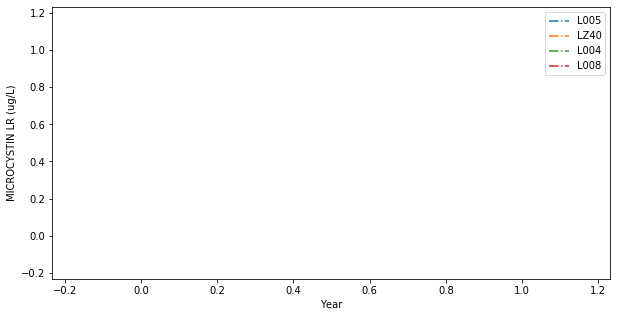

In [28]:
list_toxin = ["MICROCYSTIN","MICROCYSTIN LR"]
for variable in list_toxin:
    plt.figure(figsize=(10,5))
    for station in ["L005", "LZ40", "L004", "L008"]:
        yearly_data, unit = Request_yearly_data(station=station, variable=variable)
        if unit == "Inconsistent Units":
            print(f"Inconsistent Units at {station}")
        plt.plot(np.arange(1970,2020,1), yearly_data, label = station, linestyle = '-.')
    plt.xlabel("Year")
    plt.ylabel(f'{variable} ({unit})')
    plt.legend()
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


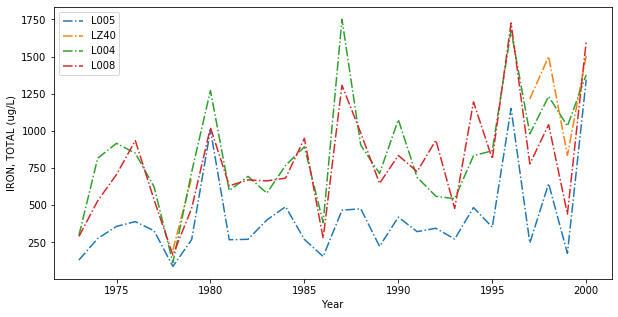

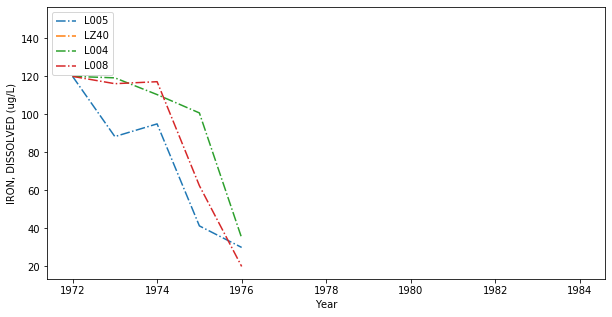

In [29]:
list_iron = ['IRON, TOTAL', 'IRON, DISSOLVED']
for variable in list_iron:
    plt.figure(figsize=(10,5))
    for station in ["L005", "LZ40", "L004", "L008"]:
        yearly_data, unit = Request_yearly_data(station=station, variable=variable)
        if unit == "Inconsistent Units":
            print(f"Inconsistent Units at {station}")
        plt.plot(np.arange(1970,2020,1), yearly_data, label = station, linestyle = '-.')
    plt.xlabel("Year")
    plt.ylabel(f'{variable} ({unit})')
    plt.legend()
    plt.show()